# Dependencies and files

## Install dependencies

## Imports

In [1]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

In [2]:
de_dir_path = '../../../results/DE/mammals/ANOVA_zscore_laminar/'

In [3]:
os.listdir(de_dir_path)

['anova_zscore_mamm.csv',
 'desktop.ini',
 'ttest_zscore_human_monkeys.csv',
 'ttest_zscore_mamm.csv']

### DE results

In [4]:
anova_res = pd.read_csv(de_dir_path + 'anova_zscore_mamm.csv', index_col=0)
anova_genes = anova_res[anova_res.p_val_adj < 0.05].index
anova_res.head()

sum_sq    df         F    PR(>F)  p_val_adj
NOC2L    5.221104  10.0  0.842126  0.590729   0.673788
KLHL17   7.392538  10.0  1.756889  0.089652   0.181595
HES4    10.147366  10.0  1.476590  0.171623   0.282792
AGRN    11.209840  10.0  2.786144  0.006975   0.029890
SDF4    12.915461  10.0  1.824119  0.076337   0.162215

In [5]:
ttest_res = pd.read_csv(de_dir_path + 'ttest_zscore_mamm.csv', index_col=0)
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0     AGRN    L1  human  chimp  0.196414  0.850770   0.914458
1   UBE2J2    L1  human  chimp -1.759429  0.128997   0.313726
2  ANKRD65    L1  human  chimp -0.968948  0.369991   0.555576
3  TMEM240    L1  human  chimp  1.925872  0.102429   0.280322
4     NADK    L1  human  chimp -7.397474  0.000313   0.011489

In [6]:
ttest_monkeys_res = pd.read_csv(de_dir_path + 'ttest_zscore_human_monkeys.csv', index_col=0)
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0     AGRN    L1  human  chimp  0.196414  0.850770   0.914458
1   UBE2J2    L1  human  chimp -1.759429  0.128997   0.313726
2  ANKRD65    L1  human  chimp -0.968948  0.369991   0.555576
3  TMEM240    L1  human  chimp  1.925872  0.102429   0.280322
4     NADK    L1  human  chimp -7.397474  0.000313   0.011489

## Load normalized pseudobulks

In [7]:
pb_dir_path = '../../../data/pseudobulks/'

In [8]:
os.listdir(pb_dir_path)

['annotation_chimp.csv',
 'annotation_human.csv',
 'annotation_macaque.csv',
 'annotation_spatial_libd_human.csv',
 'expression_chimp.csv',
 'expression_human.csv',
 'expression_macaque.csv',
 'expression_mean_chimp.csv',
 'expression_mean_human.csv',
 'expression_mean_macaque.csv',
 'expression_mean_spatial_libd_human.csv',
 'expression_spatial_libd_human.csv',
 'expression_sum_chimp.csv',
 'expression_sum_human.csv',
 'expression_sum_macaque.csv',
 'expression_sum_spatial_libd_human.csv',
 'gene_sample_mean_chimp.csv',
 'gene_sample_mean_human.csv',
 'gene_sample_mean_macaque.csv',
 'gene_sample_mean_spatial_libd_human.csv',
 'pb_age.h5ad',
 'pb_age_sample_norm.h5ad',
 'pb_age_sample_norm_zscore.h5ad',
 'pb_mamm.h5ad',
 'pb_mamm_filtered.h5ad',
 'pb_mamm_laminar_filtered.h5ad',
 'pb_mamm_laminar_sample_zscore_filtered.h5ad',
 'pb_mamm_sample_norm.h5ad',
 'pb_mamm_sample_norm_filtered.h5ad',
 'pb_mamm_sample_norm_zscore.h5ad',
 'pb_mamm_sample_zscore_filtered.h5ad']

In [10]:
adata_pb_norm = sc.read_h5ad(pb_dir_path + 'pb_mamm_laminar_sample_zscore_filtered.h5ad')
adata_pb_norm.var = anova_res
adata_pb_norm

AnnData object with n_obs × n_vars = 76 × 9435
    obs: 'layer', 'sample_id', 'condition', 'lib_size', 'log_lib_size'
    var: 'sum_sq', 'df', 'F', 'PR(>F)', 'p_val_adj'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

# Visualization

## P-value distribution

In [11]:
anova_genes = anova_res[anova_res.p_val_adj < 0.05].index
anova_genes

Index(['AGRN', 'UBE2J2', 'ANKRD65', 'TMEM240', 'NADK', 'GNB1', 'GABRD',
       'PRXL2B', 'TP73', 'CHD5',
       ...
       'PDE9A', 'NDUFV3', 'AGPAT3', 'PFKL', 'COL18A1', 'SLC19A1', 'COL6A2',
       'LSS', 'DIP2A', 'PRMT2'],
      dtype='object', length=2740)

<Axes: >

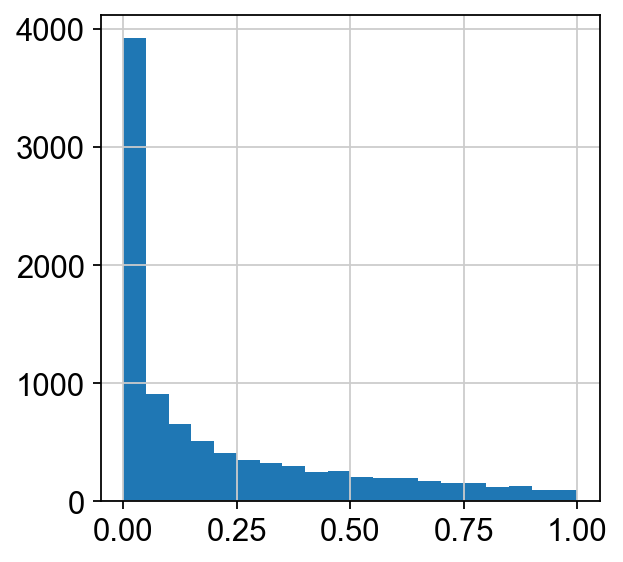

In [12]:
anova_res['PR(>F)'].hist(bins=20)

## PCA

In [13]:
adata_norm_anova = adata_pb_norm[:, adata_pb_norm.var.p_val_adj < 0.05]
df = pd.DataFrame(adata_norm_anova.X, columns=adata_norm_anova.var_names, index=adata_norm_anova.obs_names)
df.head()

AGRN    UBE2J2   ANKRD65   TMEM240      NADK      GNB1  \
L5.human_759  0.941529  1.184966 -1.243903  0.158311  0.356106 -0.133215   
L2.human_759 -1.298306 -0.947844  0.523121 -1.135065  0.038668  0.510181   
L3.human_759  0.622130  0.207339  1.314273 -0.711472 -0.642581  0.762676   
L1.human_759 -0.868319 -1.273895  0.408551 -0.471025 -0.682409 -1.934125   
L6.human_759  1.044826 -0.171655 -1.126632  0.519561  1.799359  0.602003   

                 GABRD    PRXL2B      TP73      CHD5  ...     PDE9A    NDUFV3  \
L5.human_759 -1.135133  1.248247  0.970060  1.088127  ...  1.129484  0.885143   
L2.human_759 -1.375785  0.258729 -0.633943 -0.269548  ... -1.536515 -1.181044   
L3.human_759  0.985921  0.491217 -0.633943  0.499558  ...  0.915033  0.152762   
L1.human_759  0.397623 -1.167772  1.565711 -1.778558  ...  0.365817 -1.313974   
L6.human_759  0.400810  0.428930 -0.633943  0.565250  ... -0.364426  0.657137   

                AGPAT3      PFKL   COL18A1   SLC19A1    COL6A2       LSS  \
L5.human_759 -0.913210  1.064585 -0.592065  0.783214  0.225610 -0.140429   
L2.human_759 -0.106394 -0.157560 -0.004804 -1.791202 -0.822839 -1.111851   
L3.human_759 -1.114841  0.034710 -0.483930  0.034719 -0.471914 -0.071219   
L1.human_759  0.184877 -1.429609  1.996979  1.003277  1.920101  1.725510   
L6.human_759  1.673808  1.159868 -0.396327  0.276502 -0.410020  0.382436   

                 DIP2A     PRMT2  
L5.human_759  0.680244 -0.346517  
L2.human_759 -0.975243  0.759532  
L3.human_759 -1.079287 -0.711799  
L1.human_759  0.999744  1.183187  
L6.human_759  1.009366  0.559139  

[5 rows x 2740 columns]

In [14]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(adata_pb_norm.X.T)

In [15]:
fig = px.scatter(components, x=0, y=1, hover_name=adata_pb_norm.var_names, color=(adata_pb_norm.var.p_val_adj < 0.05), opacity=0.5)
fig.show('notebook')

# Genes that a significant for different species (t-test)

## Human-specific genes

In [16]:
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0     AGRN    L1  human  chimp  0.196414  0.850770   0.914458
1   UBE2J2    L1  human  chimp -1.759429  0.128997   0.313726
2  ANKRD65    L1  human  chimp -0.968948  0.369991   0.555576
3  TMEM240    L1  human  chimp  1.925872  0.102429   0.280322
4     NADK    L1  human  chimp -7.397474  0.000313   0.011489

Subset genes that are significant in human comparisons

In [17]:
# subset signif genes
human_specific = ttest_res[(ttest_res.p_val_adj < 0.05) & (ttest_res.group1 == 'human')].copy()
# add column for direction of change
human_specific['change_dir'] = np.sign(human_specific.score).map({1: 'up', -1: 'down'})
# make one-hot columns for second group
onehot_group2 = pd.get_dummies(human_specific.group2)
human_specific = pd.concat([human_specific, onehot_group2], axis=1)

human_specific.tail()

gene layer group1   group2      score    pvalue  p_val_adj  \
5439  MAPK8IP2    L6  human  macaque   5.251868  0.001184   0.040015   
5444      JAM2    L6  human  macaque   7.423131  0.000147   0.014427   
5447      SOD1    L6  human  macaque  13.116156  0.000003   0.002608   
5465      PCP4    L6  human  macaque   6.732156  0.000269   0.019645   
5467     BACE2    L6  human  macaque   7.028282  0.000206   0.017838   

     change_dir  chimp  macaque  
5439         up  False     True  
5444         up  False     True  
5447         up  False     True  
5465         up  False     True  
5467         up  False     True

### Barplot for number of sign genes

Aggregate comparisons for each layer

In [18]:
dummie_df = (
    human_specific
    .groupby(['change_dir', 'layer', 'gene'],  group_keys=True, as_index=False)
    .agg({'chimp': 'sum', 'macaque': 'sum'})
)

dummie_df['shared'] = dummie_df.chimp * dummie_df.macaque
dummie_df.tail()

change_dir layer     gene  chimp  macaque  shared
1563         up    L6     XKR4      0        1       0
1564         up    L6    YPEL5      1        0       0
1565         up    L6   ZBTB46      1        0       0
1566         up    L6  ZDHHC22      0        1       0
1567         up    L6   ZMYND8      0        1       0

Count number of signif genes for each layer

In [19]:
count_sign = (
    dummie_df
    .groupby(['change_dir', 'layer'])
    .agg({'shared': 'sum', 'chimp': 'sum', 'macaque': 'sum'})
)

count_sign

shared  chimp  macaque
change_dir layer                        
down       L1         23     81      169
           L2          9     37      121
           L3          7     32      143
           L4          4     13       59
           L5          2     16       27
           L6          9     37       74
up         L1         11     78       86
           L2         16     52       91
           L3         11     28      145
           L4         10     35      110
           L5         10     31       64
           L6          7     45      113

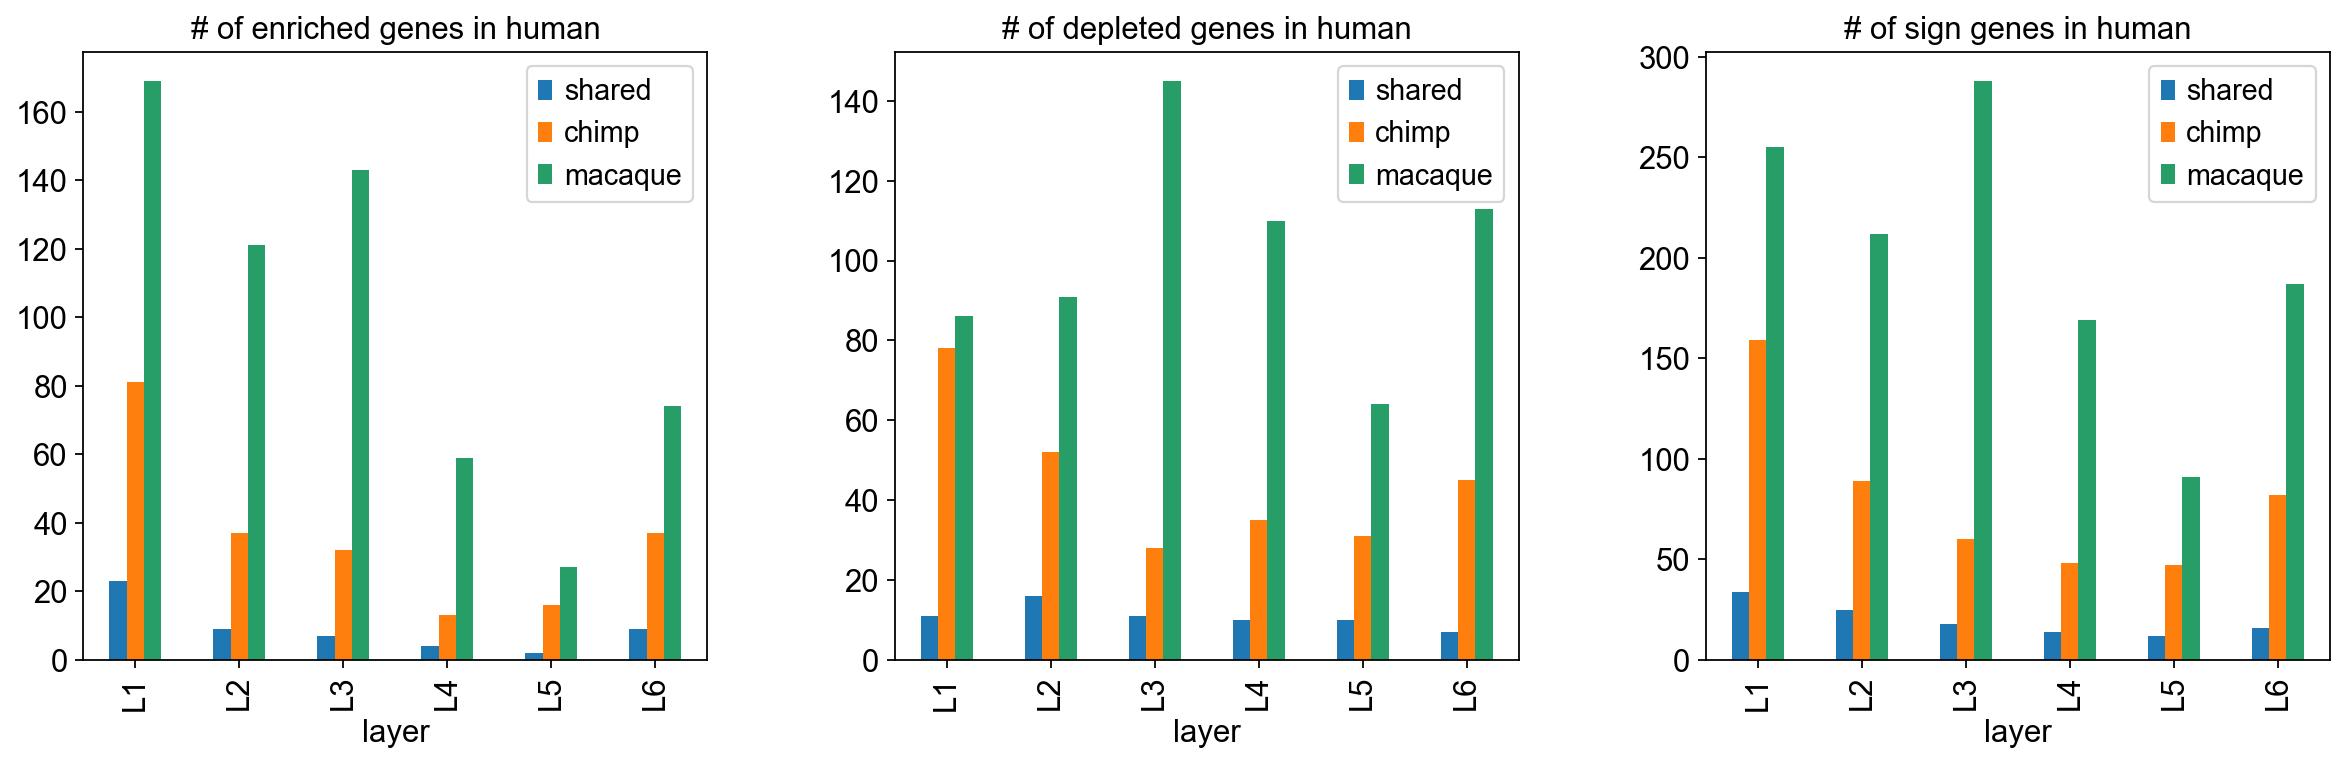

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'wspace': 0.3})

count_sign.loc['down'].plot.bar(ax=ax[0])
ax[0].set_title('# of enriched genes in human')
ax[0].grid(False)

count_sign.loc['up'].plot.bar(ax=ax[1])
ax[1].set_title('# of depleted genes in human')
ax[1].grid(False)

(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .groupby('layer')
    .agg({'shared': 'sum', 'chimp': 'sum', 'macaque': 'sum'})
    .plot
    .bar(ax=ax[2])
)

ax[2].set_title('# of sign genes in human')
ax[2].grid(False)

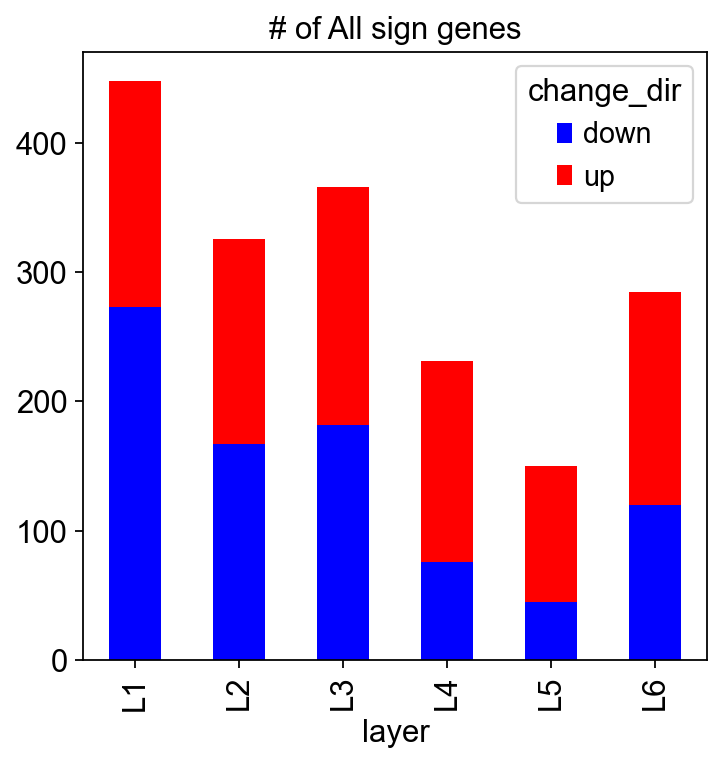

In [21]:
fig, ax = plt.subplots(figsize=(5, 5), gridspec_kw={'wspace': 0.3})
(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .sum(axis=1)
    .unstack()
    .plot
    .bar(stacked=True, ax=ax, color=['blue', 'red'])
)

ax.set_title('# of All sign genes')
ax.grid(False)

### Barplot for composition of sign genes

In [28]:
composition_sign = count_sign.copy()
# subtract shared genes
composition_sign.loc[:, ['chimp', 'macaque']] = composition_sign.loc[:, ['chimp', 'macaque']] - composition_sign.shared.values.reshape(12, -1)
# divide by total number of genes for each layer
composition_sign = composition_sign / composition_sign.sum(axis=1).values.reshape(12, -1)
composition_sign

shared     chimp   macaque
change_dir layer                              
down       L1     0.101322  0.255507  0.643172
           L2     0.060403  0.187919  0.751678
           L3     0.041667  0.148810  0.809524
           L4     0.058824  0.132353  0.808824
           L5     0.048780  0.341463  0.609756
           L6     0.088235  0.274510  0.637255
up         L1     0.071895  0.437908  0.490196
           L2     0.125984  0.283465  0.590551
           L3     0.067901  0.104938  0.827160
           L4     0.074074  0.185185  0.740741
           L5     0.117647  0.247059  0.635294
           L6     0.046358  0.251656  0.701987

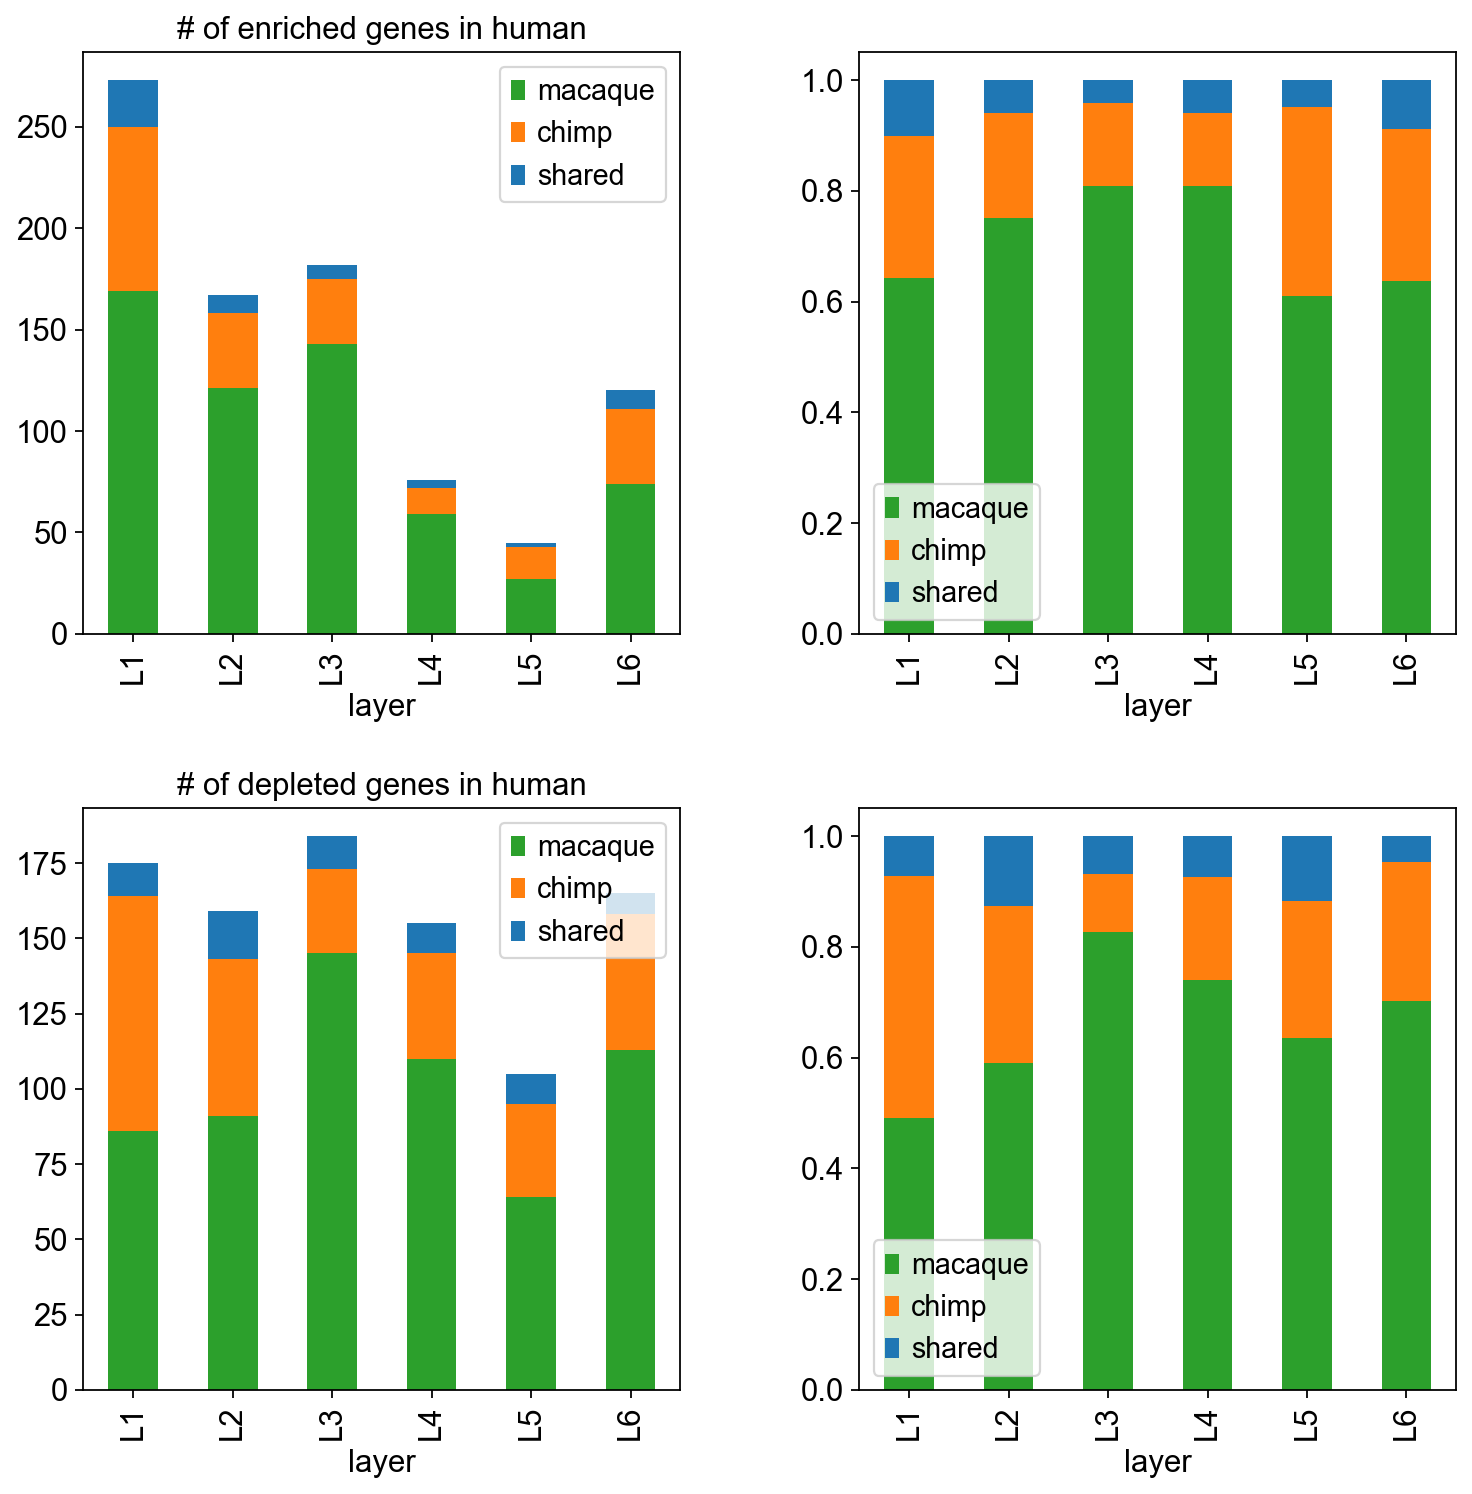

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(11, 11), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
order = ['macaque', 'chimp', 'shared']
color = {'macaque': 'tab:green', 'chimp': 'tab:orange', 'shared': 'tab:blue'}

count_sign.loc['down', order].plot.bar(ax=ax[0, 0], color=color, stacked=True)
ax[0, 0].set_title('# of enriched genes in human')
ax[0, 0].grid(False)

count_sign.loc['up', order].plot.bar(ax=ax[1, 0], color=color, stacked=True)
ax[1, 0].set_title('# of depleted genes in human')
ax[1, 0].grid(False)

composition_sign.loc['down', order].plot.bar(ax=ax[0, 1], stacked=True, color=color)
ax[0, 1].grid(False)

composition_sign.loc['up', order].plot.bar(ax=ax[1, 1], stacked=True, color=color)
ax[1, 1].grid(False)

### Jaccard heatmap for layers

In [30]:
dummie_layer = (
    dummie_df
    .layer
    .str
    .get_dummies()
)

dummie_layer['gene'] = dummie_df['gene']

dummie_layer = (
    dummie_layer
    .groupby('gene')
    .sum()
    .replace({2: 1})
)
dummie_layer.head()

L1  L2  L3  L4  L5  L6
gene                         
AARS1   0   0   1   0   0   0
AATK    0   1   0   0   0   0
ABAT    0   0   0   0   0   1
ABCD2   0   0   1   0   0   1
ABHD8   0   0   1   0   0   1

In [31]:
dummie_layer.sum()

L1    380
L2    276
L3    330
L4    203
L5    126
L6    253
dtype: int64

In [32]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('jaccard')
pairwise_jaccard = pd.DataFrame(1 - dist.pairwise(dummie_layer.T), columns=dummie_layer.columns, index=dummie_layer.columns)
pairwise_jaccard

L1        L2        L3        L4        L5        L6
L1  1.000000  0.052970  0.079027  0.089720  0.060797  0.069257
L2  0.052970  1.000000  0.057592  0.048140  0.063492  0.084016
L3  0.079027  0.057592  1.000000  0.066000  0.048276  0.110476
L4  0.089720  0.048140  0.066000  1.000000  0.031348  0.078014
L5  0.060797  0.063492  0.048276  0.031348  1.000000  0.058659
L6  0.069257  0.084016  0.110476  0.078014  0.058659  1.000000

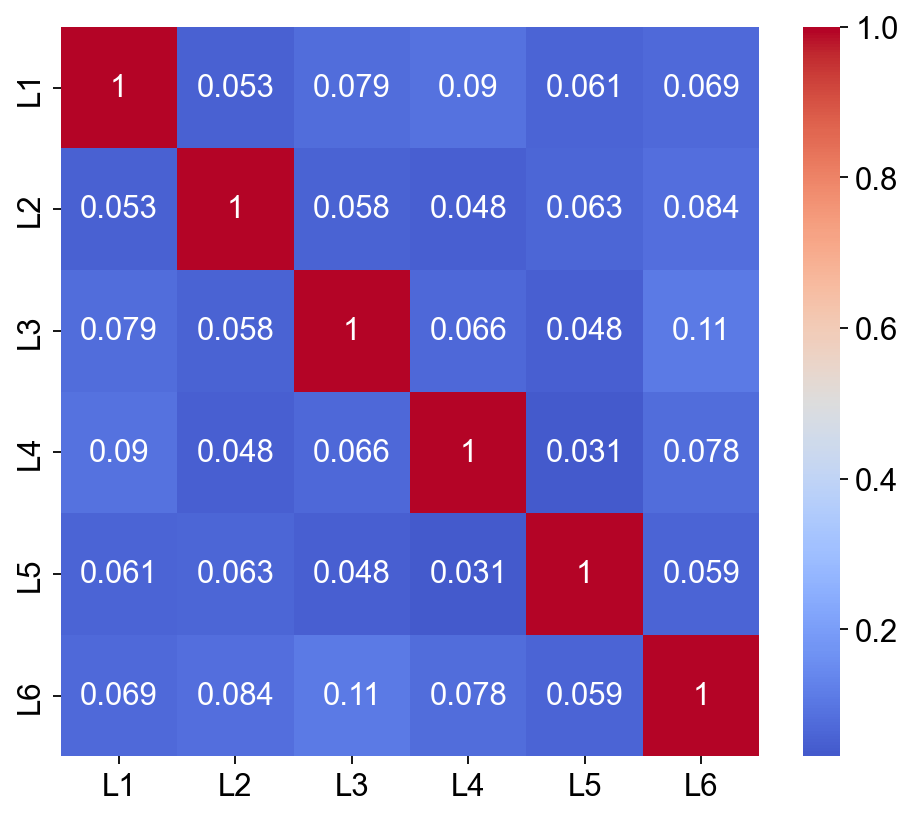

In [33]:
plt.figure(figsize=(7, 6))
sns.heatmap(pairwise_jaccard, annot=True, cmap = 'coolwarm', center=0.5)
plt.grid(False)

## Chimpanzee-specific genes

In [34]:
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0     AGRN    L1  human  chimp  0.196414  0.850770   0.914458
1   UBE2J2    L1  human  chimp -1.759429  0.128997   0.313726
2  ANKRD65    L1  human  chimp -0.968948  0.369991   0.555576
3  TMEM240    L1  human  chimp  1.925872  0.102429   0.280322
4     NADK    L1  human  chimp -7.397474  0.000313   0.011489

Subset genes that are significant in chimp comparisons

In [35]:
# subset signif genes
chimp_specific = ttest_res[(ttest_res.p_val_adj < 0.05) & ((ttest_res.group1 == 'chimp') | (ttest_res.group2 == 'chimp'))].copy()
chimp_specific.loc[chimp_specific.group1 == 'human', ['group1', 'group2']] = ['chimp', 'human']
chimp_specific.loc[chimp_specific.group2 == 'human', 'score'] *= -1
# add column for direction of change
chimp_specific['change_dir'] = np.sign(chimp_specific.score).map({1: 'up', -1: 'down'})
# make one-hot columns for second group
onehot_group2 = pd.get_dummies(chimp_specific.group2)
chimp_specific = pd.concat([chimp_specific, onehot_group2], axis=1)

chimp_specific.tail()

gene layer group1   group2      score        pvalue  p_val_adj  \
8161    CHADL    L6  chimp  macaque  -7.746181  2.432189e-04   0.019015   
8185    GRIK1    L6  chimp  macaque  11.360801  2.786243e-05   0.007152   
8190  TMEM50B    L6  chimp  macaque -26.710449  1.818312e-07   0.000267   
8207    BACE2    L6  chimp  macaque   5.197338  2.020043e-03   0.048497   
8216   COL6A2    L6  chimp  macaque   8.675312  1.294388e-04   0.014235   

     change_dir  human  macaque  
8161       down  False     True  
8185         up  False     True  
8190       down  False     True  
8207         up  False     True  
8216         up  False     True

### Barplot for number of sign genes

Aggregate comparisons for each layer

In [36]:
dummie_df = (
    chimp_specific
    .groupby(['change_dir', 'layer', 'gene'],  group_keys=True, as_index=False)
    .agg({'human': 'sum', 'macaque': 'sum'})
)

dummie_df['shared'] = dummie_df.human * dummie_df.macaque
dummie_df.tail()

change_dir layer    gene  human  macaque  shared
1152         up    L6    VRK3      1        0       0
1153         up    L6    VWC2      1        1       1
1154         up    L6   WFDC2      0        1       0
1155         up    L6  YJEFN3      0        1       0
1156         up    L6  ZFAND3      1        0       0

Count number of signif genes for each layer

In [37]:
count_sign = (
    dummie_df
    .groupby(['change_dir', 'layer'])
    .agg({'shared': 'sum', 'human': 'sum', 'macaque': 'sum'})
)

count_sign

shared  human  macaque
change_dir layer                        
down       L1         22     78      126
           L2         10     52       95
           L3          4     28       76
           L4          2     35       39
           L5          1     31       20
           L6          1     45       45
up         L1          9     81       91
           L2          6     37       55
           L3          1     32       83
           L4          1     13       35
           L5          0     16       26
           L6          4     37       42

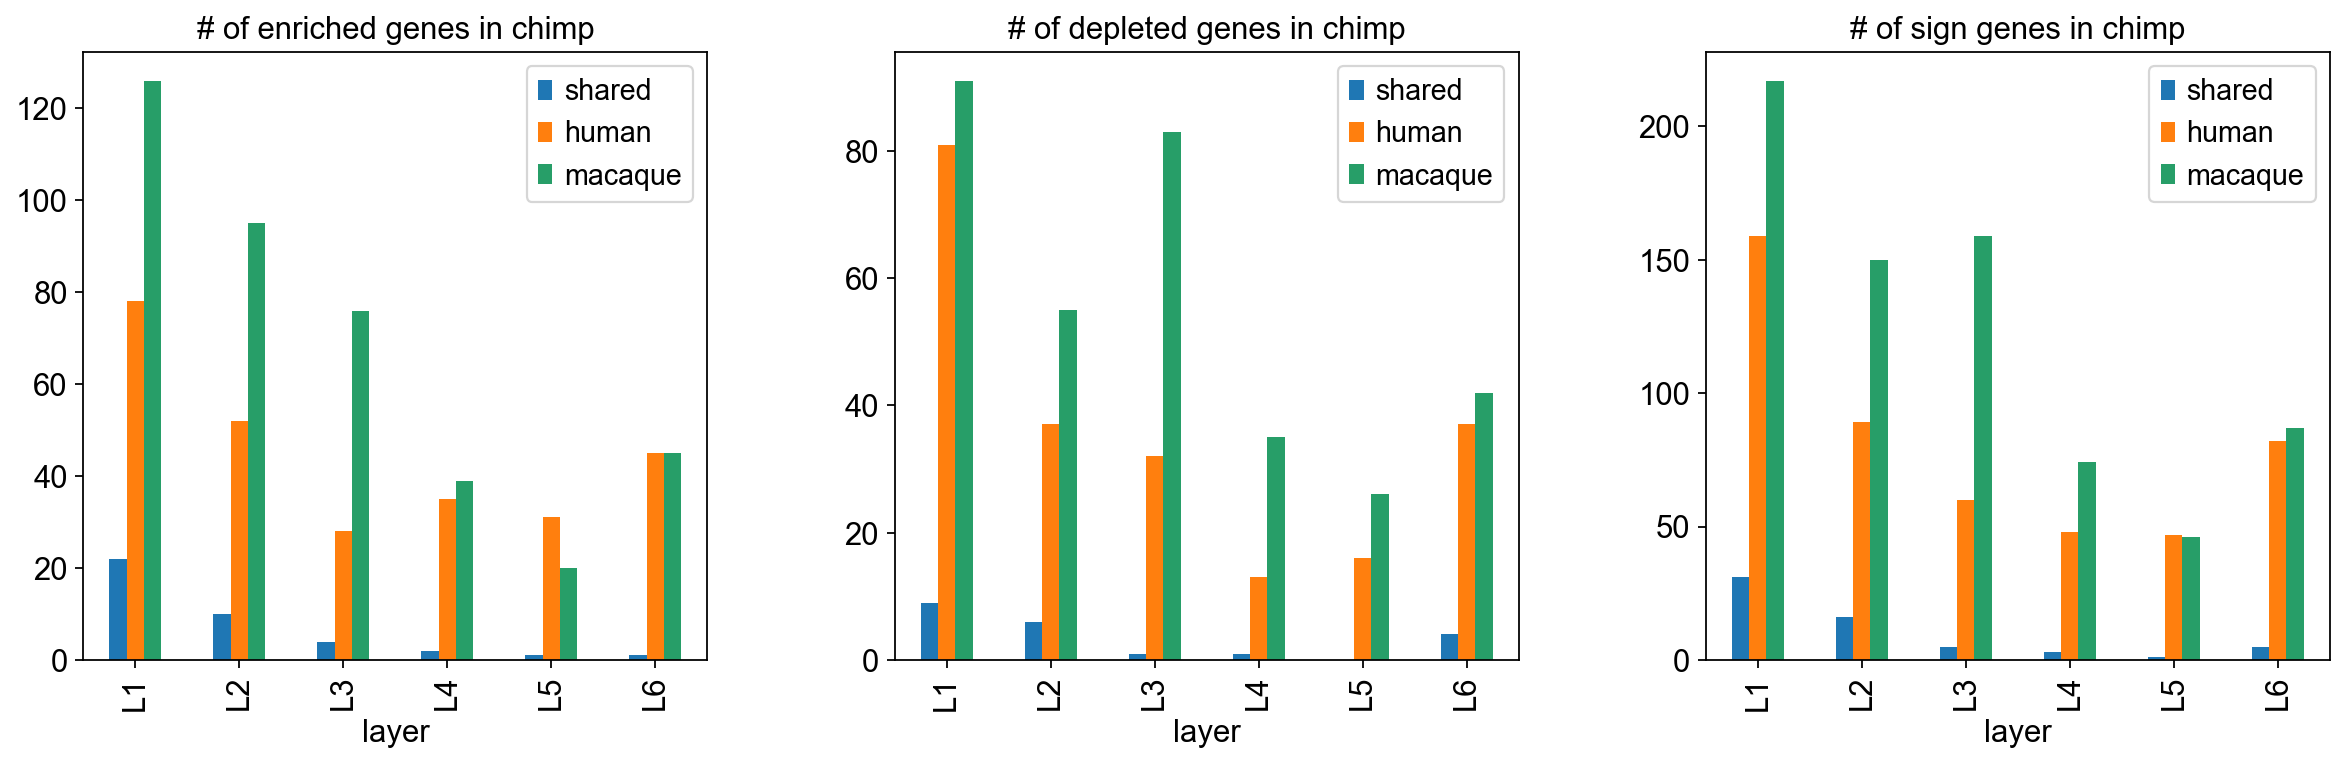

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'wspace': 0.3})

count_sign.loc['down'].plot.bar(ax=ax[0])
ax[0].set_title('# of enriched genes in chimp')
ax[0].grid(False)

count_sign.loc['up'].plot.bar(ax=ax[1])
ax[1].set_title('# of depleted genes in chimp')
ax[1].grid(False)

(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .groupby('layer')
    .agg({'shared': 'sum', 'human': 'sum', 'macaque': 'sum'})
    .plot
    .bar(ax=ax[2])
)

ax[2].set_title('# of sign genes in chimp')
ax[2].grid(False)

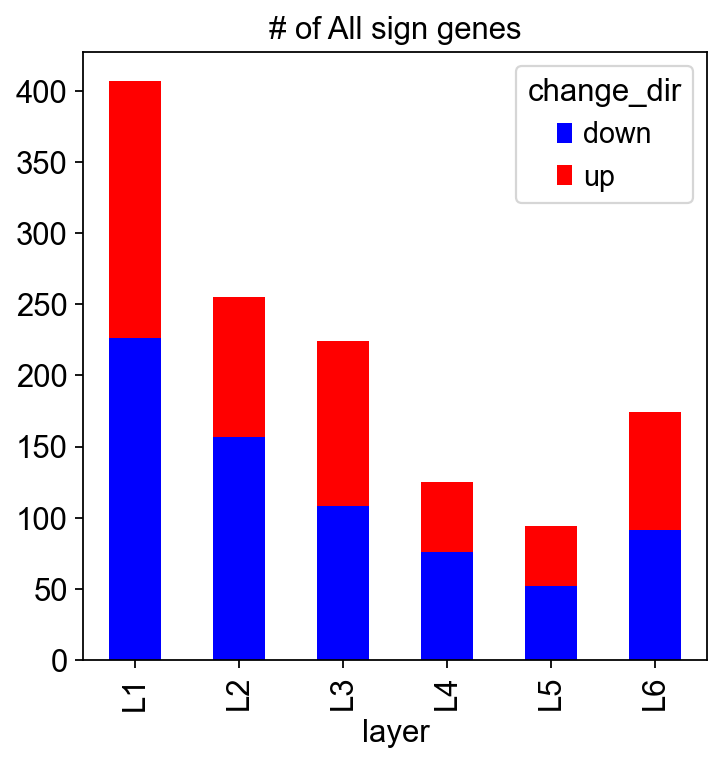

In [39]:
fig, ax = plt.subplots(figsize=(5, 5), gridspec_kw={'wspace': 0.3})
(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .sum(axis=1)
    .unstack()
    .plot
    .bar(stacked=True, ax=ax, color=['blue', 'red'])
)

ax.set_title('# of All sign genes')
ax.grid(False)

### Barplot for composition of sign genes

In [40]:
composition_sign = count_sign.copy()
# subtract shared genes
composition_sign.loc[:, ['human', 'macaque']] = composition_sign.loc[:, ['human', 'macaque']] - composition_sign.shared.values.reshape(12, -1)
# divide by total number of genes for each layer
composition_sign = composition_sign / composition_sign.sum(axis=1).values.reshape(12, -1)
composition_sign

shared     human   macaque
change_dir layer                              
down       L1     0.120879  0.307692  0.571429
           L2     0.072993  0.306569  0.620438
           L3     0.040000  0.240000  0.720000
           L4     0.027778  0.458333  0.513889
           L5     0.020000  0.600000  0.380000
           L6     0.011236  0.494382  0.494382
up         L1     0.055215  0.441718  0.503067
           L2     0.069767  0.360465  0.569767
           L3     0.008772  0.271930  0.719298
           L4     0.021277  0.255319  0.723404
           L5     0.000000  0.380952  0.619048
           L6     0.053333  0.440000  0.506667

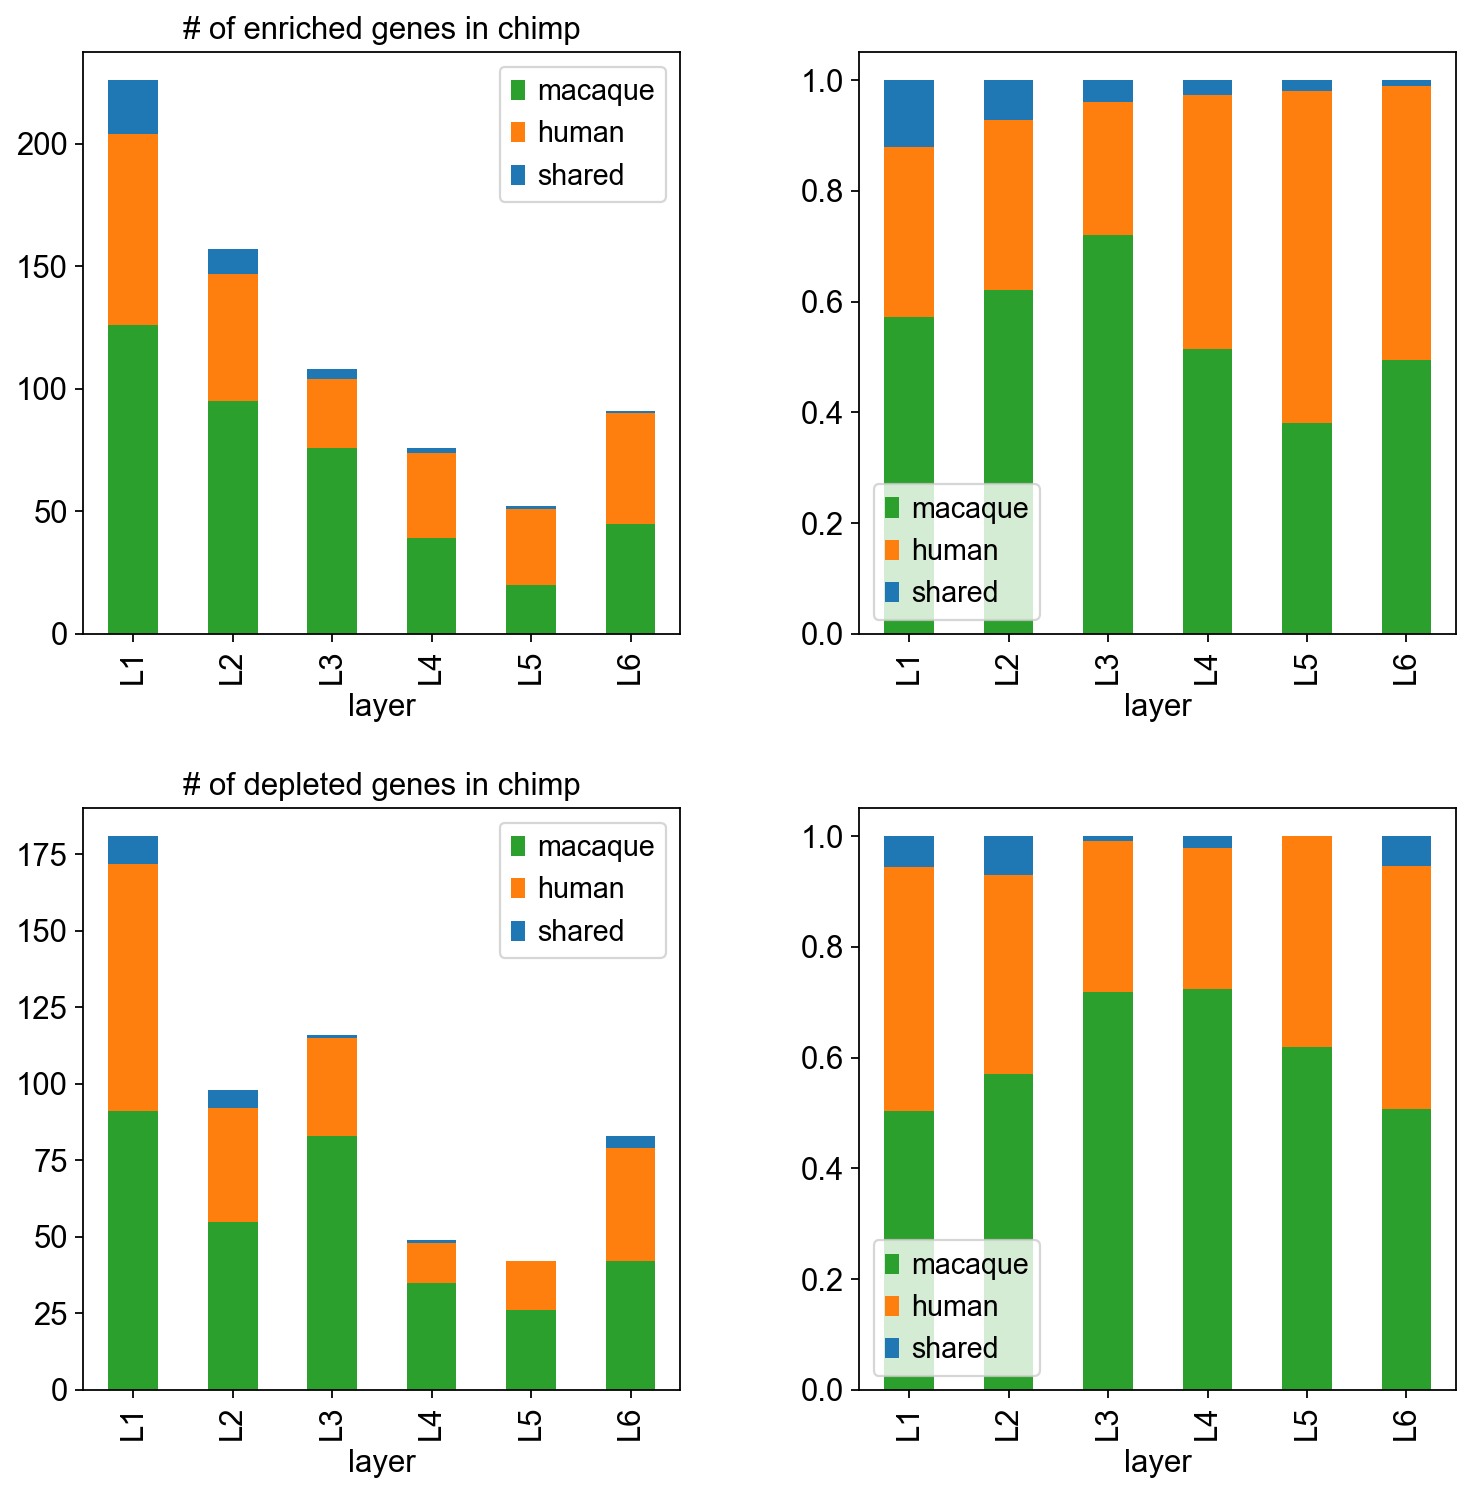

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(11, 11), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
order = ['macaque', 'human', 'shared']
color = {'macaque': 'tab:green', 'human': 'tab:orange', 'shared': 'tab:blue'}

count_sign.loc['down', order].plot.bar(ax=ax[0, 0], color=color, stacked=True)
ax[0, 0].set_title('# of enriched genes in chimp')
ax[0, 0].grid(False)

count_sign.loc['up', order].plot.bar(ax=ax[1, 0], color=color, stacked=True)
ax[1, 0].set_title('# of depleted genes in chimp')
ax[1, 0].grid(False)

composition_sign.loc['down', order].plot.bar(ax=ax[0, 1], stacked=True, color=color)
ax[0, 1].grid(False)

composition_sign.loc['up', order].plot.bar(ax=ax[1, 1], stacked=True, color=color)
ax[1, 1].grid(False)

### Jaccard heatmap for layers

In [42]:
dummie_layer = (
    dummie_df
    .layer
    .str
    .get_dummies()
)

dummie_layer['gene'] = dummie_df['gene']

dummie_layer = (
    dummie_layer
    .groupby('gene')
    .sum()
    .replace({2: 1})
)
dummie_layer.head()

L1  L2  L3  L4  L5  L6
gene                         
A1BG    0   0   1   0   0   0
AATK    0   1   0   0   0   0
ABCD2   0   0   0   0   0   1
ABHD8   0   0   0   0   0   1
ABI2    0   0   1   0   0   1

In [43]:
dummie_layer.sum()

L1    345
L2    222
L3    213
L4    119
L5     91
L6    164
dtype: int64

In [44]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('jaccard')
pairwise_jaccard = pd.DataFrame(1 - dist.pairwise(dummie_layer.T), columns=dummie_layer.columns, index=dummie_layer.columns)
pairwise_jaccard

L1        L2        L3        L4        L5        L6
L1  1.000000  0.065789  0.052830  0.042697  0.045564  0.053830
L2  0.065789  1.000000  0.050725  0.027108  0.053872  0.040431
L3  0.052830  0.050725  1.000000  0.027864  0.020134  0.058989
L4  0.042697  0.027108  0.027864  1.000000  0.050000  0.040441
L5  0.045564  0.053872  0.020134  0.050000  1.000000  0.058091
L6  0.053830  0.040431  0.058989  0.040441  0.058091  1.000000

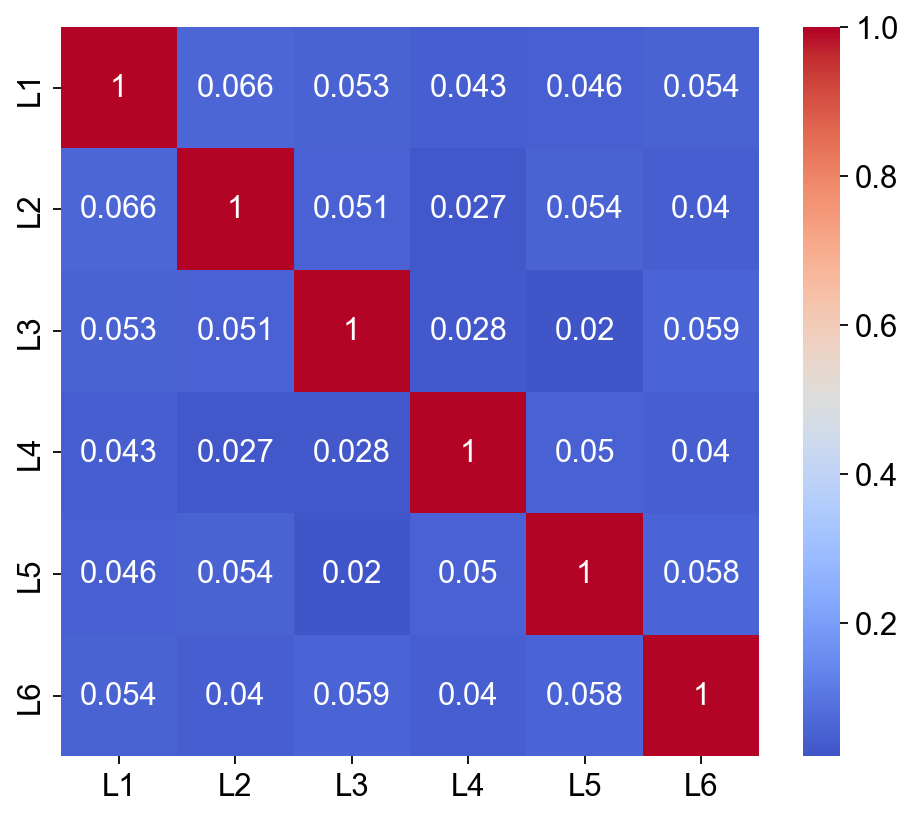

In [45]:
plt.figure(figsize=(7, 6))
sns.heatmap(pairwise_jaccard, annot=True, cmap = 'coolwarm', center=0.5)
plt.grid(False)

## Macaque-specific genes

In [46]:
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0     AGRN    L1  human  chimp  0.196414  0.850770   0.914458
1   UBE2J2    L1  human  chimp -1.759429  0.128997   0.313726
2  ANKRD65    L1  human  chimp -0.968948  0.369991   0.555576
3  TMEM240    L1  human  chimp  1.925872  0.102429   0.280322
4     NADK    L1  human  chimp -7.397474  0.000313   0.011489

Subset genes that are significant in macaque comparisons

In [47]:
# subset signif genes
macaque_specific = ttest_res[(ttest_res.p_val_adj < 0.05) &  (ttest_res.group2 == 'macaque')].copy()
macaque_specific.columns = ['gene', 'layer', 'group2', 'group1', 'score', 'pvalue', 'p_val_adj']
macaque_specific.score = -1 * macaque_specific.score
# add column for direction of change
macaque_specific['change_dir'] = np.sign(macaque_specific.score).map({1: 'up', -1: 'down'})
# make one-hot columns for second group
onehot_group2 = pd.get_dummies(macaque_specific.group2)
macaque_specific = pd.concat([macaque_specific, onehot_group2], axis=1)

macaque_specific.tail()

gene layer group2   group1      score        pvalue  p_val_adj  \
8161    CHADL    L6  chimp  macaque   7.746181  2.432189e-04   0.019015   
8185    GRIK1    L6  chimp  macaque -11.360801  2.786243e-05   0.007152   
8190  TMEM50B    L6  chimp  macaque  26.710449  1.818312e-07   0.000267   
8207    BACE2    L6  chimp  macaque  -5.197338  2.020043e-03   0.048497   
8216   COL6A2    L6  chimp  macaque  -8.675312  1.294388e-04   0.014235   

     change_dir  chimp  human  
8161         up   True  False  
8185       down   True  False  
8190         up   True  False  
8207       down   True  False  
8216       down   True  False

### Barplot for number of sign genes

Aggregate comparisons for each layer

In [48]:
dummie_df = (
    macaque_specific
    .groupby(['change_dir', 'layer', 'gene'],  group_keys=True, as_index=False)
    .agg({'human': 'sum', 'chimp': 'sum'})
)

dummie_df['shared'] = dummie_df.human * dummie_df.chimp
dummie_df.tail()

change_dir layer     gene  human  chimp  shared
1753         up    L6  TMEM87A      0      1       0
1754         up    L6     TRMU      1      0       0
1755         up    L6   UBE2L6      0      1       0
1756         up    L6     UBR5      1      0       0
1757         up    L6     UGT8      0      1       0

Count number of signif genes for each layer

In [49]:
count_sign = (
    dummie_df
    .groupby(['change_dir', 'layer'])
    .agg({'shared': 'sum', 'human': 'sum', 'chimp': 'sum'})
)

count_sign

shared  human  chimp
change_dir layer                      
down       L1         19     86     91
           L2          9     91     55
           L3         22    145     83
           L4          9    110     35
           L5          6     64     26
           L6         10    113     42
up         L1         26    169    126
           L2         27    121     95
           L3         27    143     76
           L4         10     59     39
           L5          1     27     20
           L6         11     74     45

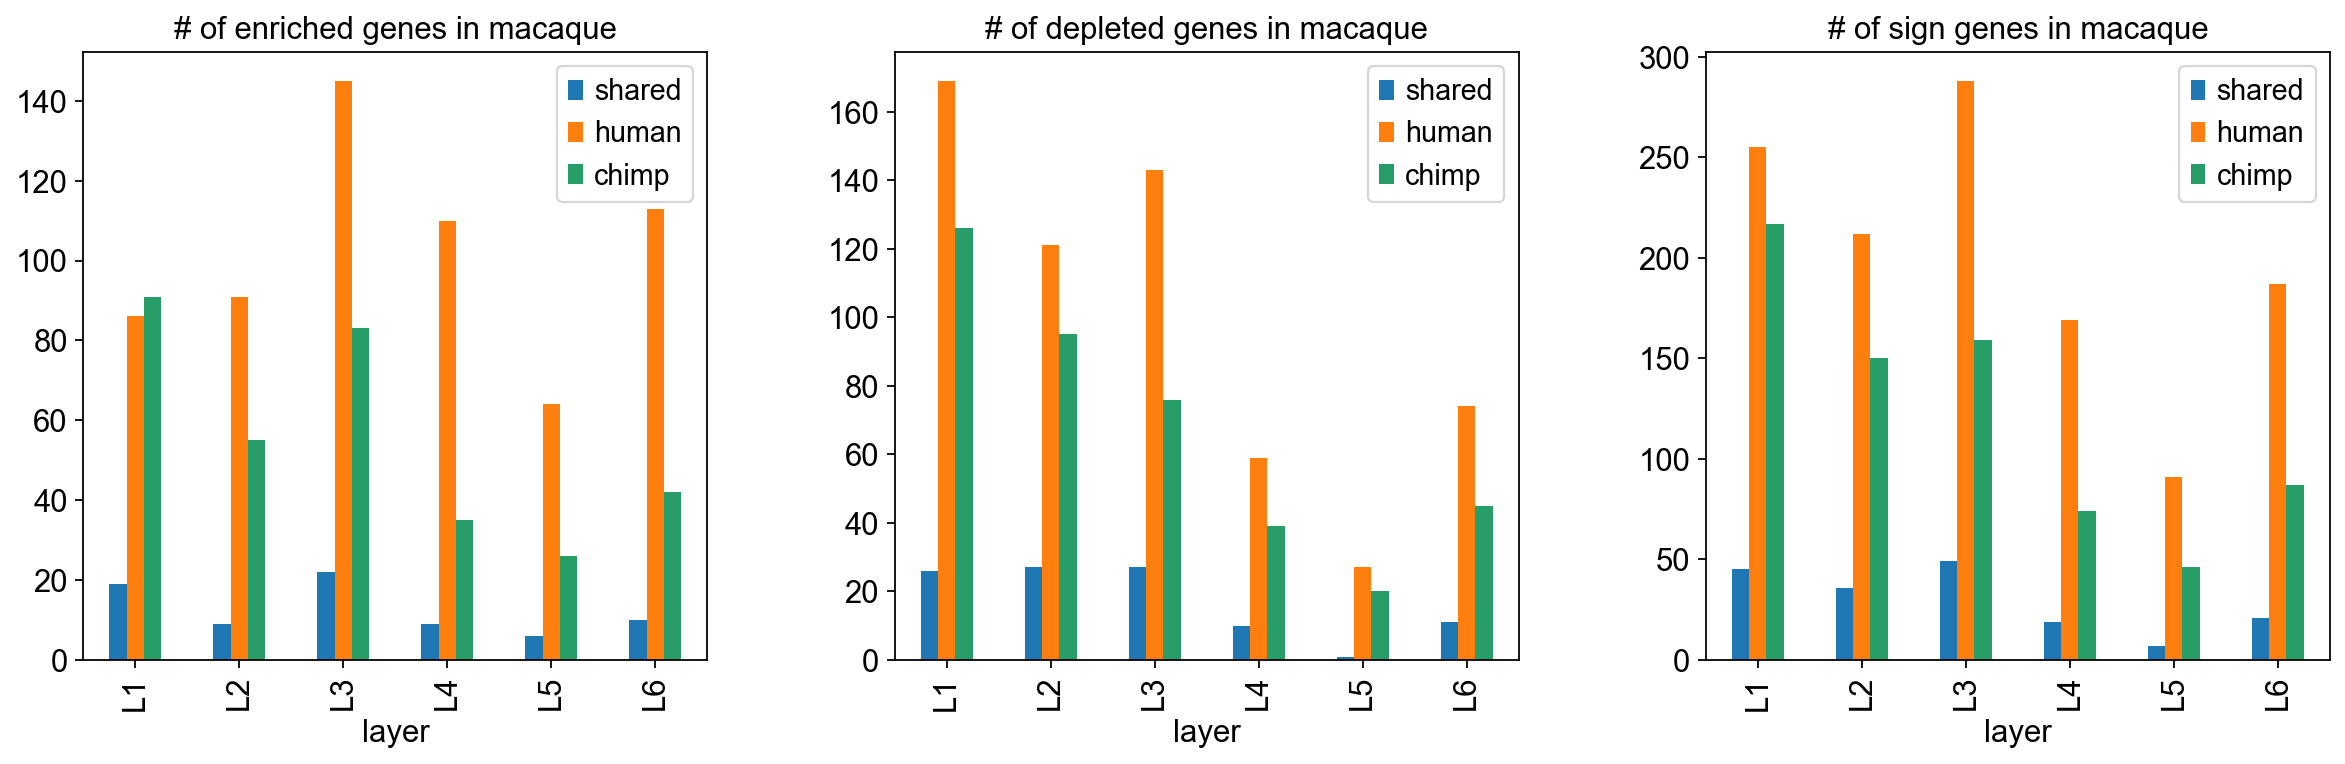

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'wspace': 0.3})

count_sign.loc['down'].plot.bar(ax=ax[0])
ax[0].set_title('# of enriched genes in macaque')
ax[0].grid(False)

count_sign.loc['up'].plot.bar(ax=ax[1])
ax[1].set_title('# of depleted genes in macaque')
ax[1].grid(False)

(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .groupby('layer')
    .agg({'shared': 'sum', 'human': 'sum', 'chimp': 'sum'})
    .plot
    .bar(ax=ax[2])
)

ax[2].set_title('# of sign genes in macaque')
ax[2].grid(False)

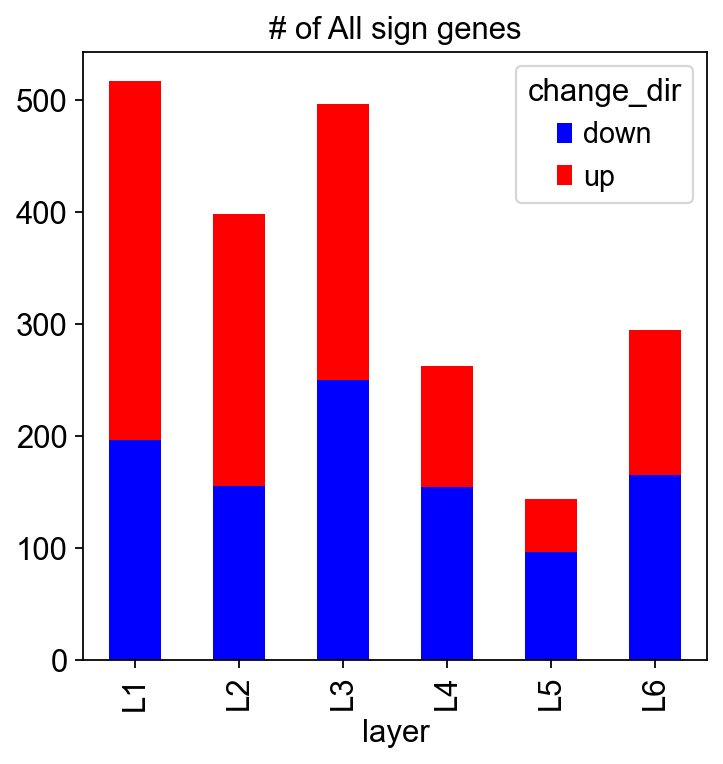

In [51]:
fig, ax = plt.subplots(figsize=(5, 5), gridspec_kw={'wspace': 0.3})
(
    count_sign
    .reorder_levels(['layer', 'change_dir'])
    .sum(axis=1)
    .unstack()
    .plot
    .bar(stacked=True, ax=ax, color=['blue', 'red'])
)

ax.set_title('# of All sign genes')
ax.grid(False)

### Barplot for composition of sign genes

In [52]:
composition_sign = count_sign.copy()
# subtract shared genes
composition_sign.loc[:, ['human', 'chimp']] = composition_sign.loc[:, ['human', 'chimp']] - composition_sign.shared.values.reshape(12, -1)
# divide by total number of genes for each layer
composition_sign = composition_sign / composition_sign.sum(axis=1).values.reshape(12, -1)
composition_sign

shared     human     chimp
change_dir layer                              
down       L1     0.120253  0.424051  0.455696
           L2     0.065693  0.598540  0.335766
           L3     0.106796  0.597087  0.296117
           L4     0.066176  0.742647  0.191176
           L5     0.071429  0.690476  0.238095
           L6     0.068966  0.710345  0.220690
up         L1     0.096654  0.531599  0.371747
           L2     0.142857  0.497354  0.359788
           L3     0.140625  0.604167  0.255208
           L4     0.113636  0.556818  0.329545
           L5     0.021739  0.565217  0.413043
           L6     0.101852  0.583333  0.314815

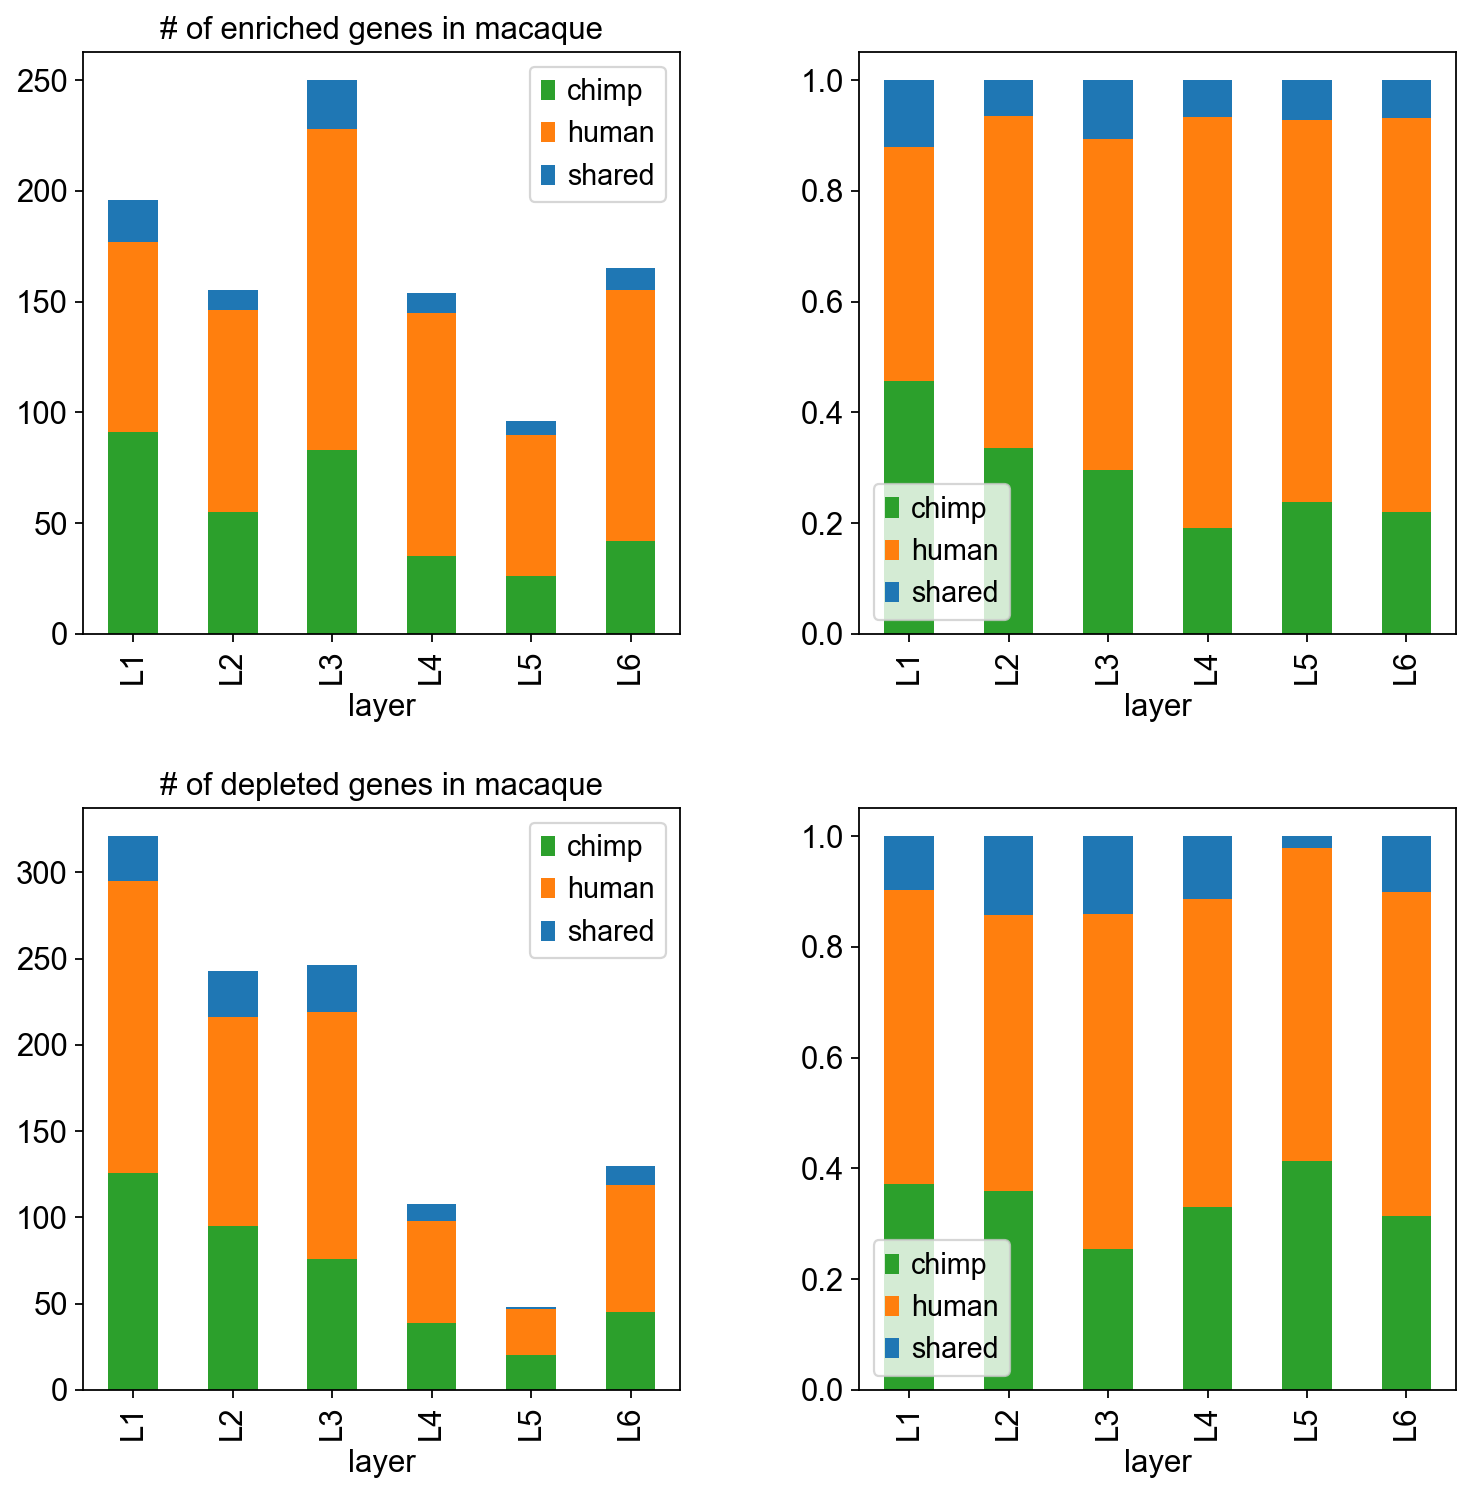

In [53]:
fig, ax = plt.subplots(2, 2, figsize=(11, 11), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
order = ['chimp', 'human', 'shared']
color = {'chimp': 'tab:green', 'human': 'tab:orange', 'shared': 'tab:blue'}

count_sign.loc['down', order].plot.bar(ax=ax[0, 0], color=color, stacked=True)
ax[0, 0].set_title('# of enriched genes in macaque')
ax[0, 0].grid(False)

count_sign.loc['up', order].plot.bar(ax=ax[1, 0], color=color, stacked=True)
ax[1, 0].set_title('# of depleted genes in macaque')
ax[1, 0].grid(False)

composition_sign.loc['down', order].plot.bar(ax=ax[0, 1], stacked=True, color=color)
ax[0, 1].grid(False)

composition_sign.loc['up', order].plot.bar(ax=ax[1, 1], stacked=True, color=color)
ax[1, 1].grid(False)

### Jaccard heatmap for layers

In [54]:
dummie_layer = (
    dummie_df
    .layer
    .str
    .get_dummies()
)

dummie_layer['gene'] = dummie_df['gene']

dummie_layer = (
    dummie_layer
    .groupby('gene')
    .sum()
    .replace({2: 1})
)
dummie_layer.head()

L1  L2  L3  L4  L5  L6
gene                         
A1BG    0   0   1   0   0   0
AARS1   0   0   1   0   0   0
ABAT    0   0   0   0   0   1
ABCD2   0   0   1   0   0   1
ABHD8   0   0   1   0   0   0

In [55]:
dummie_layer.sum()

L1    427
L2    326
L3    398
L4    224
L5    130
L6    253
dtype: int64

In [56]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('jaccard')
pairwise_jaccard = pd.DataFrame(1 - dist.pairwise(dummie_layer.T), columns=dummie_layer.columns, index=dummie_layer.columns)
pairwise_jaccard

L1        L2        L3        L4        L5        L6
L1  1.000000  0.062059  0.094164  0.094118  0.062977  0.064163
L2  0.062059  1.000000  0.085457  0.045627  0.055556  0.074212
L3  0.094164  0.085457  1.000000  0.066895  0.047619  0.114726
L4  0.094118  0.045627  0.066895  1.000000  0.047337  0.076749
L5  0.062977  0.055556  0.047619  0.047337  1.000000  0.066852
L6  0.064163  0.074212  0.114726  0.076749  0.066852  1.000000

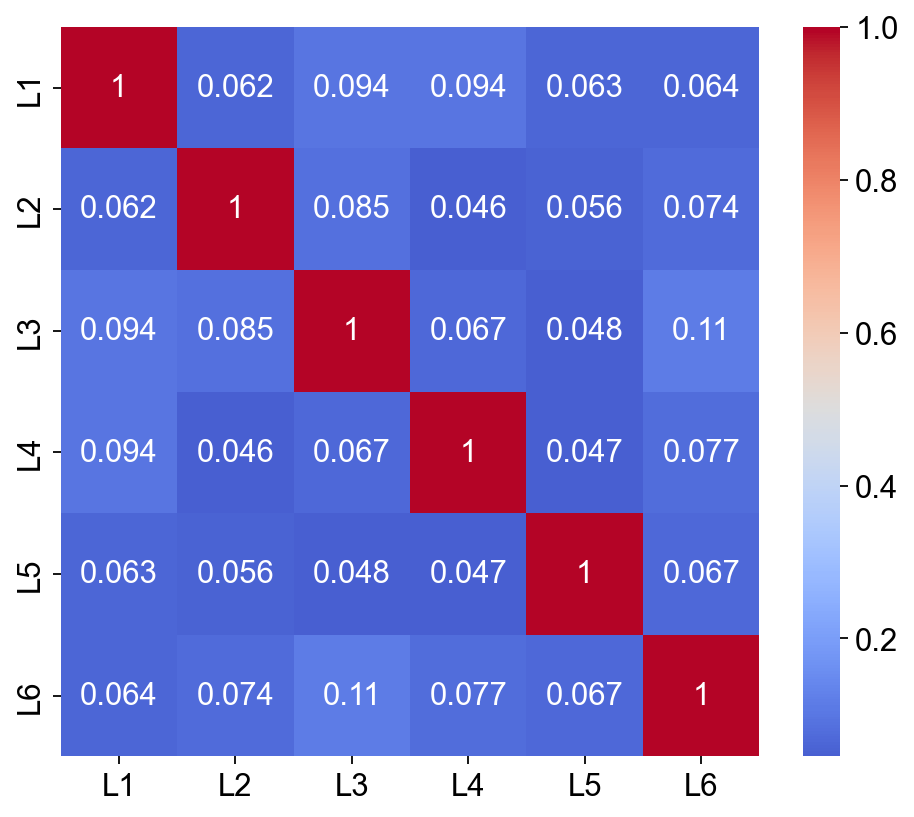

In [57]:
plt.figure(figsize=(7, 6))
sns.heatmap(pairwise_jaccard, annot=True, cmap = 'coolwarm', center=0.5)
plt.grid(False)